# Problem 9

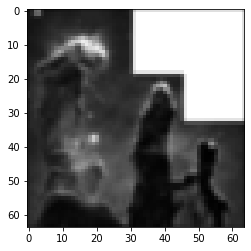

In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt
import scipy.io as io

mat = io.loadmat('blurryimage.mat')
blurry_image = mat['blurryimage']

plt.imshow(blurry_image, cmap='gray')
plt.show()

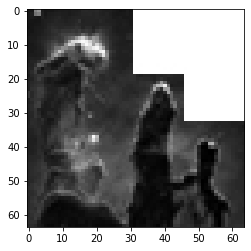

In [13]:
n = blurry_image.shape[0]
b = blurry_image.flatten()

A = sp.lil_matrix((n**2, n**2))

def xytoj(x, y, n):
    return x+n*y

for i in range(n):
    for j in range(n):
        A[xytoj(i, j, n), xytoj(i, j, n)] = 0.5

        if i > 0:
            A[xytoj(i, j, n), xytoj(i-1, j, n)] = 0.125
        if i < n-1:
            A[xytoj(i, j, n), xytoj(i+1, j, n)] = 0.125
        if j > 0:
            A[xytoj(i, j, n), xytoj(i, j-1, n)] = 0.125
        if j < n-1:
            A[xytoj(i, j, n), xytoj(i, j+1, n)] = 0.125

A = A.tocsr()

x = linalg.bicg(A, b)[0]
recovered_image = np.reshape(x, (n, n))

plt.imshow(recovered_image, cmap='gray')
plt.show()